In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
def plot_benzene(ax, size=20):

    z_val = 0

    benzene = f"""
    C    -1.2073830   -0.6970829    {z_val} 
    C    -1.2073830    0.6970829    {z_val} 
    C     0.0000000    1.3941659    {z_val} 
    C     1.2073830    0.6970829    {z_val} 
    C     1.2073830   -0.6970829    {z_val} 
    C     0.0000000   -1.3941659    {z_val} 
    H    -2.1490090   -1.2407309    {z_val} 
    H    -2.1490090    1.2407309    {z_val} 
    H     0.0000000    2.4814619    {z_val} 
    H     2.1490090    1.2407309    {z_val} 
    H     2.1490090   -1.2407309    {z_val} 
    H     0.0000000   -2.4814619    {z_val}"""
    for line in benzene.split("\n"):
        if line:
            atom, x, y, z = line.split()
            if (atom == 'C'):
                ax.plot(float(x), float(y), "o", label=atom, markersize=2*size, color="red")
            else:
                ax.plot(float(x), float(y), "o", label=atom, markersize=size, color="white")

In [3]:
f2 = open('../data/fixed/gce-planeavedensity-02.000-020.000--065.000-0.00500-d7bc3fa5-2c9a-46b9-8c22-fdcc3c682235.dat','r')
x = np.arange(-5,5,4.878049E-02)
y = np.arange(-5,5,4.878049E-02)
rho9 = np.genfromtxt(f2,skip_header=3)
rho9 = np.reshape(rho9,(205,205))
f2.close()
f2 = open('../data/fixed/gce-planeavedensity-02.000-020.000--045.000-0.00500-6511a34e-7973-49d7-a13c-cff9a634059b.dat','r')
rho22 = np.genfromtxt(f2,skip_header=3)
rho22 = np.reshape(rho22,(205,205))
f2.close()
f2 = open('../data/fixed/gce-planeavedensity-02.000-020.000--029.000-0.00500-e79b7823-8c54-4a28-8a59-6110a9c916ff.dat','r')
rho36 = np.genfromtxt(f2,skip_header=3)
rho36 = np.reshape(rho36,(205,205))
f2.close()
x = np.arange(-10,10,9.756098E-02)
y = np.arange(-10,10,9.756098E-02)
f2 = open('../data/fixed/gce-planeavedensity-02.000-020.000--012.000-0.00500-25dc780d-0670-4d96-a4c0-20e7f7aef40e.dat','r')
rho60 = np.genfromtxt(f2,skip_header=3)
rho60 = np.reshape(rho60,(205,205))
f2.close()

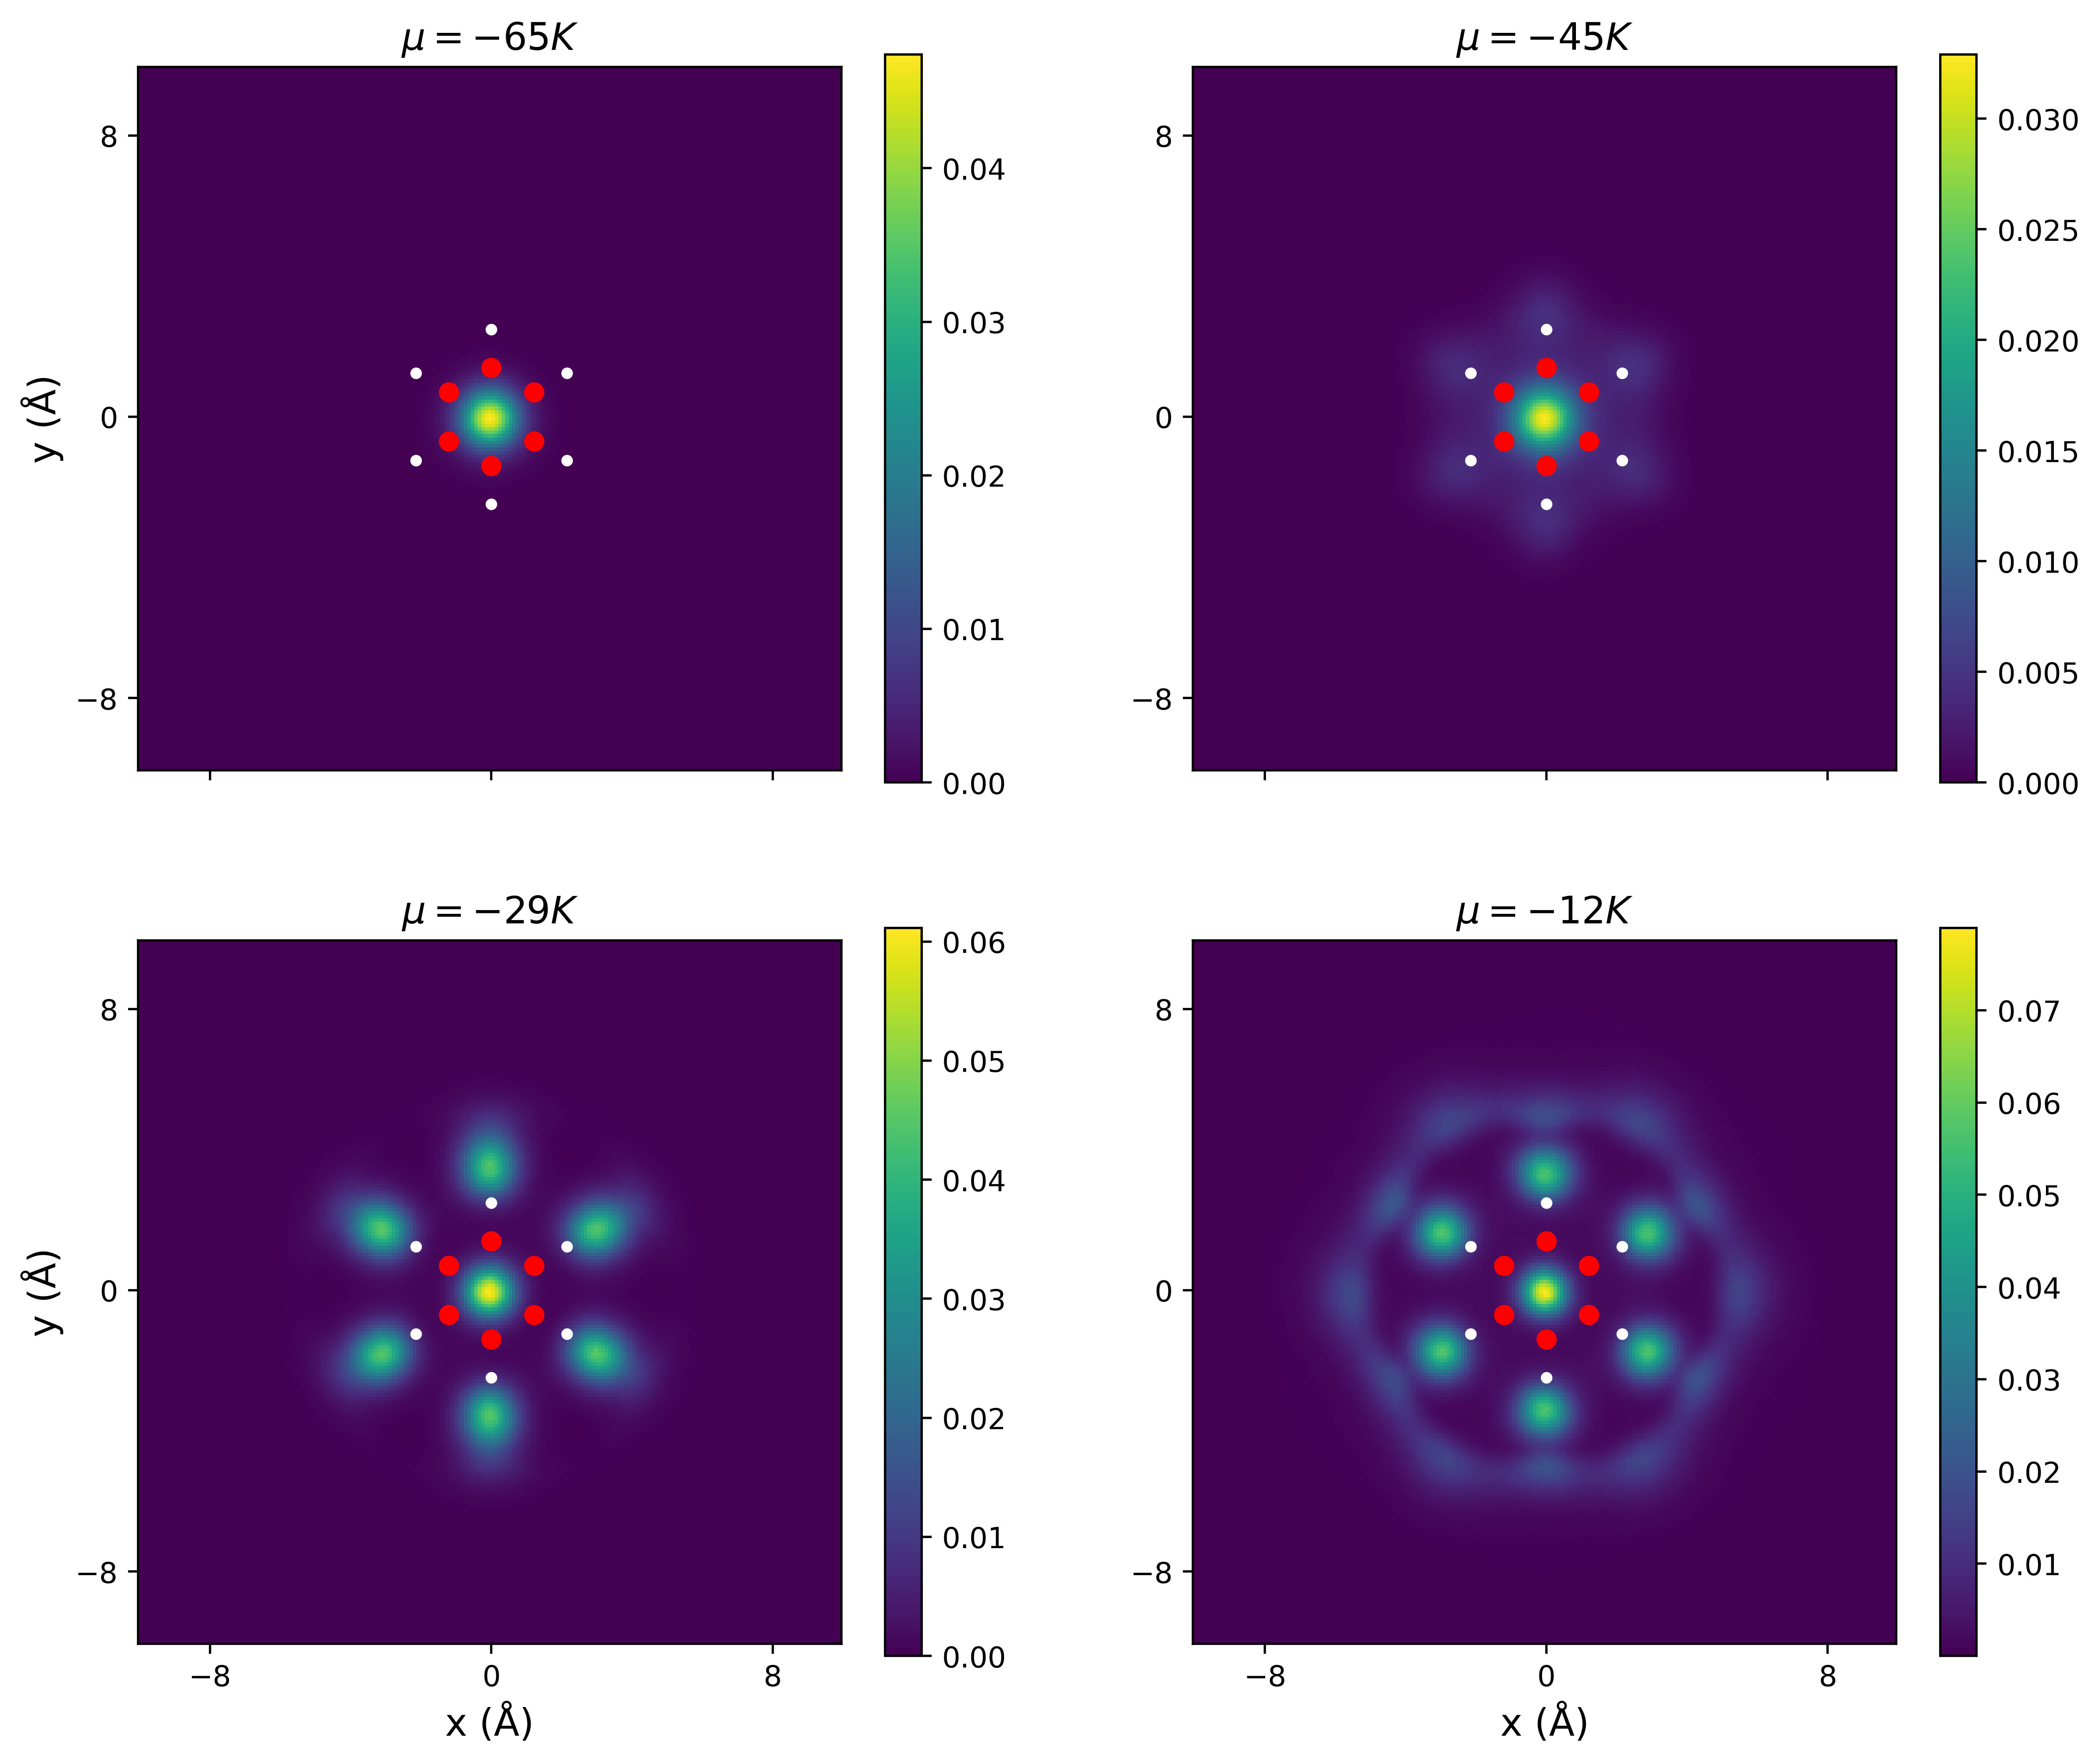

In [4]:
figsize = plt.rcParams['figure.figsize']
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(2*6,2*5),sharex=True)
line_width = 1.25
plt.gcf().set_dpi(500)
font_size = 13
plt9 = ax1.pcolormesh(x,y,rho9,rasterized=True)
ax1.set_title(r'$\mu = -65 K$',fontsize=font_size)
ax1.set_ylabel('y (Å)',fontsize=font_size)
ax1.set(adjustable='box', aspect='equal')
ax1.set_yticks([-8.0,0,8.0])
plot_benzene(ax1,3)
plt.colorbar(plt9,ax=ax1)
plt22 = ax2.pcolormesh(x,y,rho22,rasterized=True)
ax2.set_title(r'$\mu = -45 K$',fontsize=font_size)
ax2.set_yticks([-8.0,0,8.0])
ax2.set(adjustable='box', aspect='equal')
plot_benzene(ax2,3)
plt.colorbar(plt22,ax=ax2)
plt36 = ax3.pcolormesh(x,y,rho36,rasterized=True)
ax3.set_title(r'$\mu = -29 K$',fontsize=font_size)
ax3.set_xlabel('x (Å)',fontsize=font_size)
ax3.set_ylabel('y (Å)',fontsize=font_size)
ax3.set_yticks([-8.0,0,8.0])
ax3.set(adjustable='box', aspect='equal')
plt.colorbar(plt36,ax=ax3)
plot_benzene(ax3,3)
plt60 = ax4.pcolormesh(x,y,rho60,rasterized=True)
ax4.set_title(r'$\mu = -12 K$',fontsize=font_size)
ax4.set_xlabel('x (Å)',fontsize=font_size)
ax4.set_xticks([-8,0,8])
ax4.set_yticks([-8.0,0,8.0])
ax4.set(adjustable='box', aspect='equal')
plot_benzene(ax4,3)
plt.colorbar(plt60,ax=ax4)
plt.savefig('../figures/planardensityplotsLJ.pdf')